# Diabetes Prediction using classification method.
## Author: Saad Khalid Abbasi
### Date:29-06-2024


### Importing Libraries 

In [113]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score,confusion_matrix,recall_score,accuracy_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### Importing dataset using pandas library

In [10]:
df=pd.read_csv("diabetes.csv")

#### First View of data

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [13]:
# Checking the missing values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<Axes: ylabel='Age'>

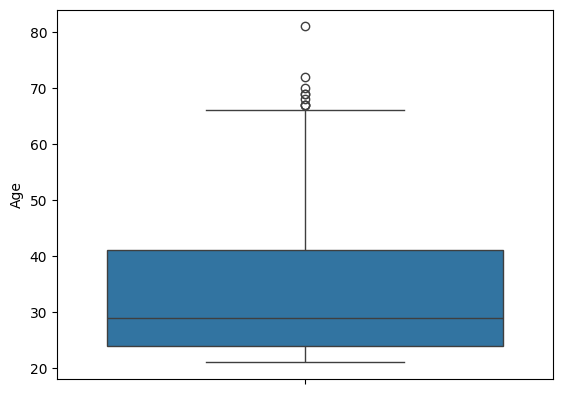

In [17]:
sns.boxplot(df,y='Age')

<Axes: xlabel='Age', ylabel='Count'>

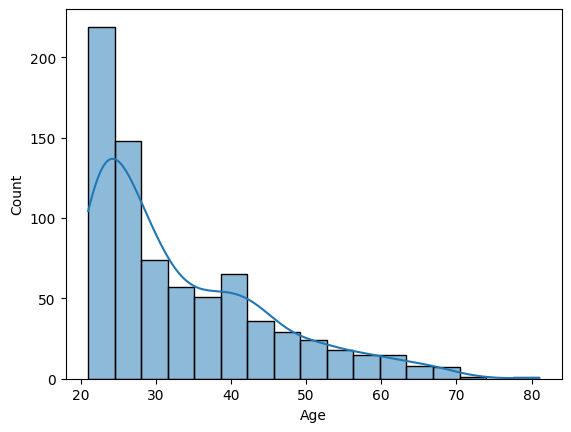

In [19]:
sns.histplot(df,x='Age',kde=1)

In [20]:
df.shape

(768, 9)

# Removing outliers from dataset

In [21]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df=df[(df['Age']>lower_limit)&(df['Age']<upper_limit)]

<Axes: ylabel='Age'>

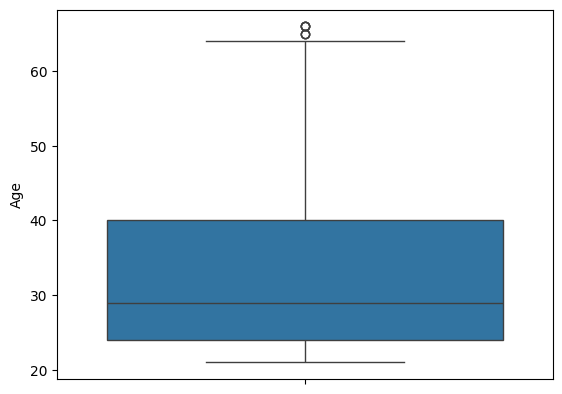

In [23]:
sns.boxplot(df,y='Age')

In [24]:
df.shape

(759, 9)

In [25]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: ylabel='Pregnancies'>

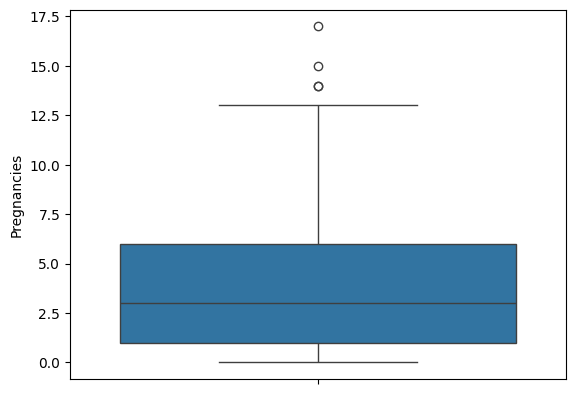

In [26]:
sns.boxplot(df,y='Pregnancies')

In [28]:
Q1=df['Pregnancies'].quantile(0.25)
Q3=df['Pregnancies'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df=df[(df['Pregnancies']>lower_limit)&(df['Pregnancies']<upper_limit)]

<Axes: ylabel='Pregnancies'>

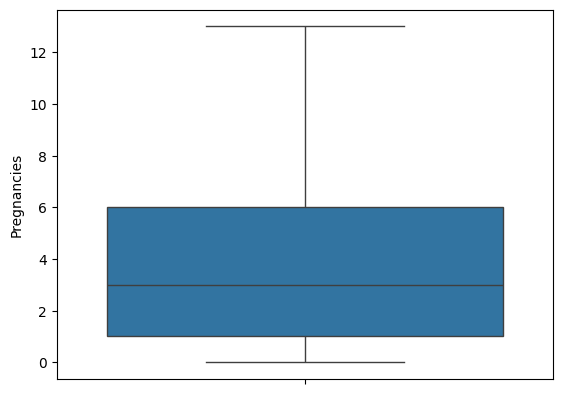

In [29]:
sns.boxplot(df,y='Pregnancies')

In [30]:
df.shape

(755, 9)

In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: ylabel='Glucose'>

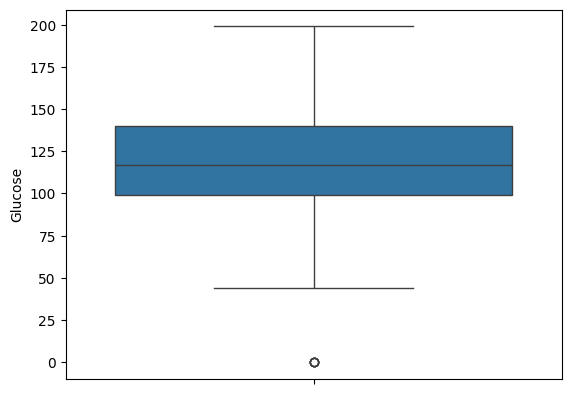

In [32]:
sns.boxplot(df,y='Glucose')

In [33]:
Q1=df['Glucose'].quantile(0.25)
Q3=df['Glucose'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df=df[(df['Glucose']>lower_limit)&(df['Glucose']<upper_limit)]

<Axes: ylabel='Glucose'>

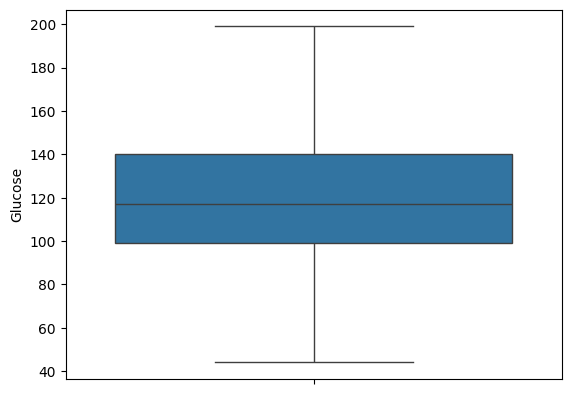

In [34]:
sns.boxplot(df,y='Glucose')

In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: ylabel='BloodPressure'>

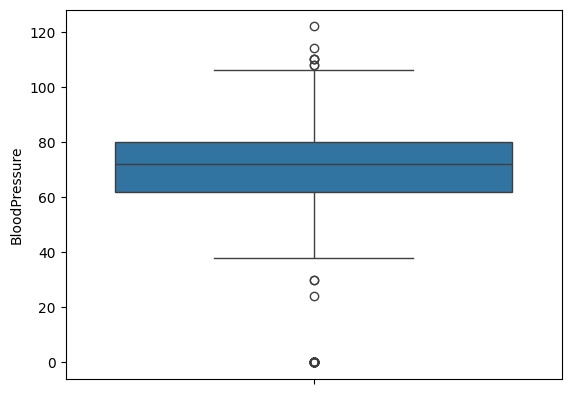

In [36]:
sns.boxplot(df,y='BloodPressure')

In [38]:
Q1=df['BloodPressure'].quantile(0.25)
Q3=df['BloodPressure'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df=df[(df['BloodPressure']>lower_limit)&(df['BloodPressure']<upper_limit)]

<Axes: ylabel='BloodPressure'>

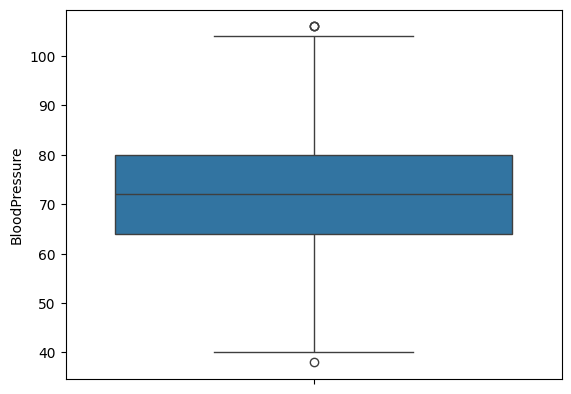

In [39]:
sns.boxplot(df,y='BloodPressure')

In [41]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: ylabel='SkinThickness'>

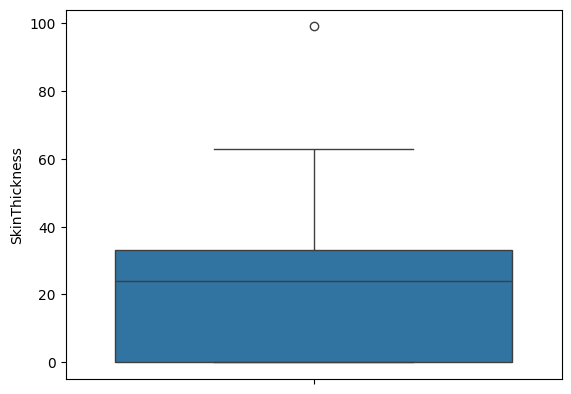

In [42]:
sns.boxplot(df,y='SkinThickness')

In [43]:
Q1=df['SkinThickness'].quantile(0.25)
Q3=df['SkinThickness'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df=df[(df['SkinThickness']>lower_limit)&(df['SkinThickness']<upper_limit)]

<Axes: ylabel='SkinThickness'>

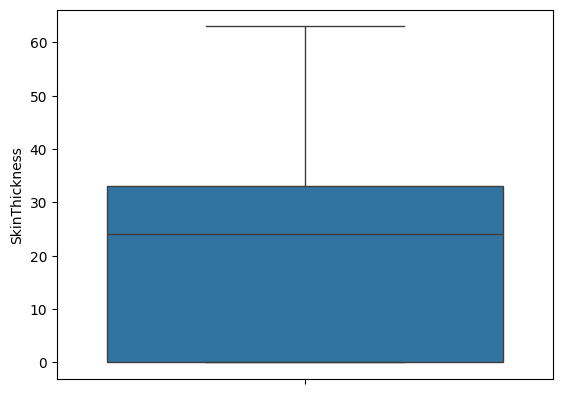

In [44]:
sns.boxplot(df,y='SkinThickness')

In [45]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: ylabel='Insulin'>

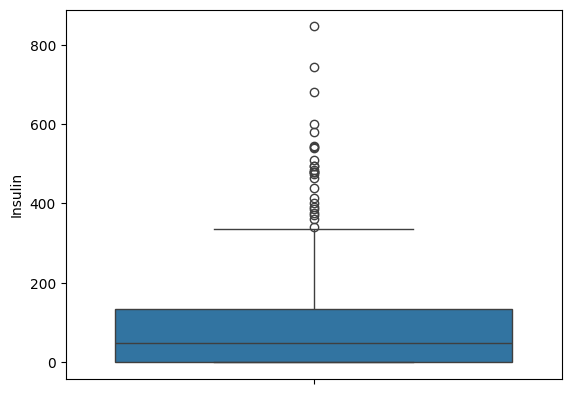

In [46]:
sns.boxplot(df,y='Insulin')

In [47]:
Q1=df['Insulin'].quantile(0.25)
Q3=df['Insulin'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df=df[(df['Insulin']>lower_limit)&(df['Insulin']<upper_limit)]

<Axes: ylabel='Insulin'>

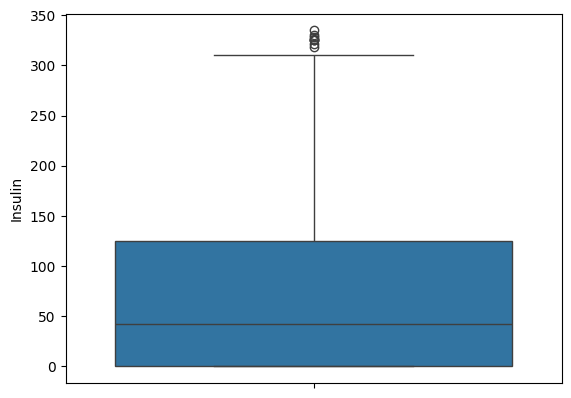

In [48]:
sns.boxplot(df,y='Insulin')

In [49]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: ylabel='BMI'>

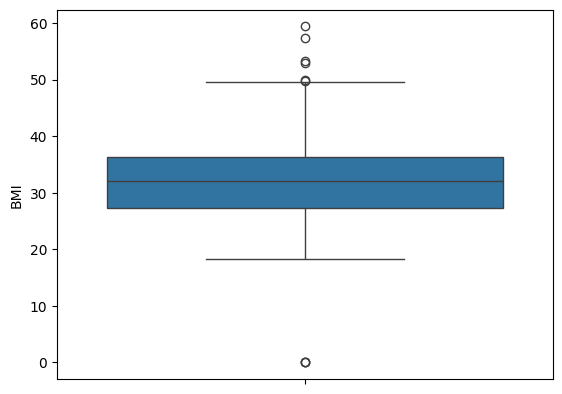

In [50]:
sns.boxplot(df,y='BMI')

In [52]:
Q1=df['BMI'].quantile(0.25)
Q3=df['BMI'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df=df[(df['BMI']>lower_limit)&(df['BMI']<upper_limit)]

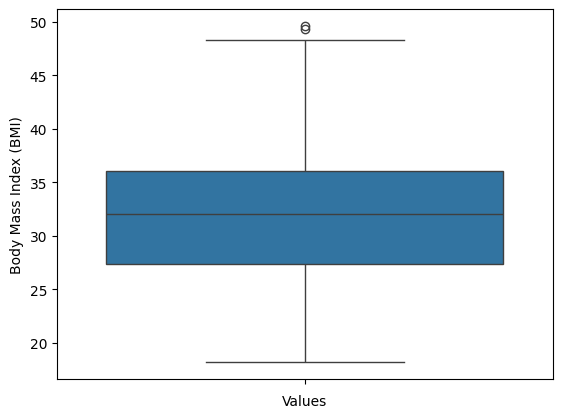

In [55]:
sns.boxplot(df,y='BMI')
plt.xlabel('Values')
plt.ylabel('Body Mass Index (BMI)')
plt.show()

In [56]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Diabetes Pedigree Function (DPF) is a metric used in medical research and diagnostics to quantify the likelihood of diabetes based on family history.

<Axes: ylabel='DiabetesPedigreeFunction'>

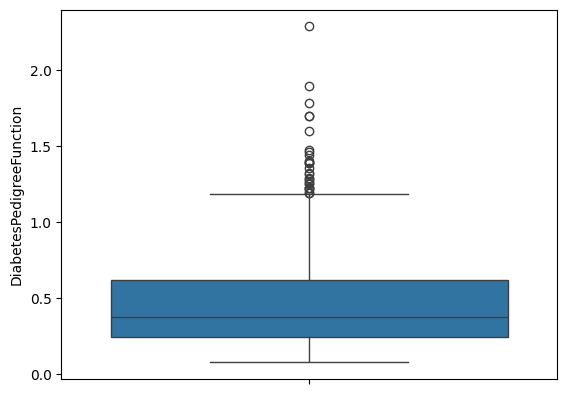

In [60]:
sns.boxplot(df,y='DiabetesPedigreeFunction')

In [61]:
Q1=df['DiabetesPedigreeFunction'].quantile(0.25)
Q3=df['DiabetesPedigreeFunction'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df=df[(df['DiabetesPedigreeFunction']>lower_limit)&(df['DiabetesPedigreeFunction']<upper_limit)]

<Axes: ylabel='DiabetesPedigreeFunction'>

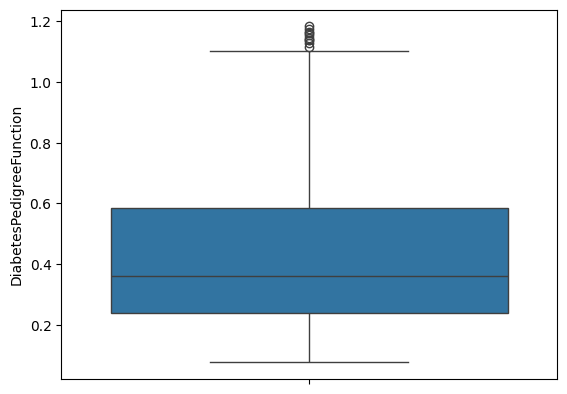

In [62]:
sns.boxplot(df,y='DiabetesPedigreeFunction')

In [63]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Checking Normalization and Normalizaton Test On Dataset

In [66]:
from scipy import stats

<Axes: xlabel='Pregnancies', ylabel='Count'>

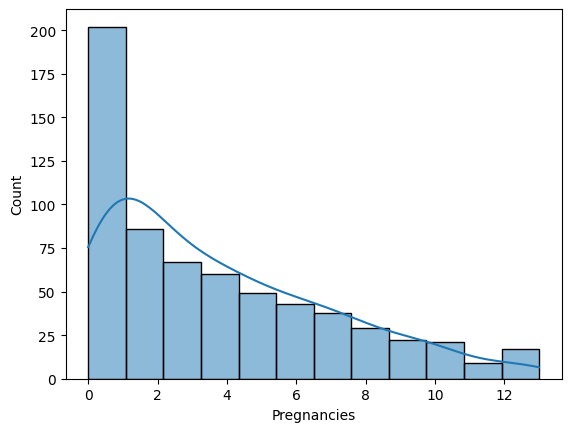

In [65]:
# FOR Pregnanceis
sns.histplot(df,x='Pregnancies',kde=1)


In [68]:
# applying Shapiro Test
stats.shapiro(df['Pregnancies'])

ShapiroResult(statistic=0.9071445677921545, pvalue=2.374383504102668e-19)

<Axes: xlabel='Glucose', ylabel='Count'>

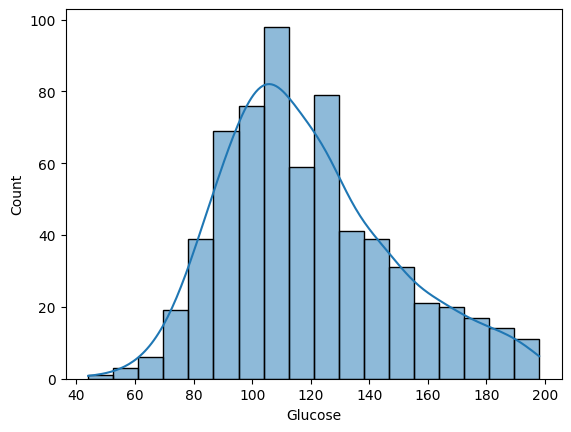

In [69]:
# For Glucose
sns.histplot(df,x='Glucose',kde=1)

In [70]:
# Applying Shapiro Test
stats.shapiro(df['Glucose'])

ShapiroResult(statistic=0.9685390734080016, pvalue=1.6163633576475777e-10)

<Axes: xlabel='BloodPressure', ylabel='Count'>

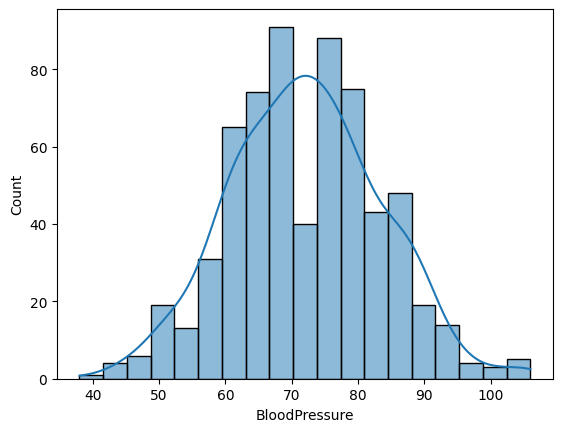

In [72]:
# For Blood Pressure
sns.histplot(df,x='BloodPressure',kde=1)

In [73]:
# Applying Shapiro Test
stats.shapiro(df['BloodPressure'])

ShapiroResult(statistic=0.9953133949898632, pvalue=0.04856308387722328)

<Axes: xlabel='SkinThickness', ylabel='Count'>

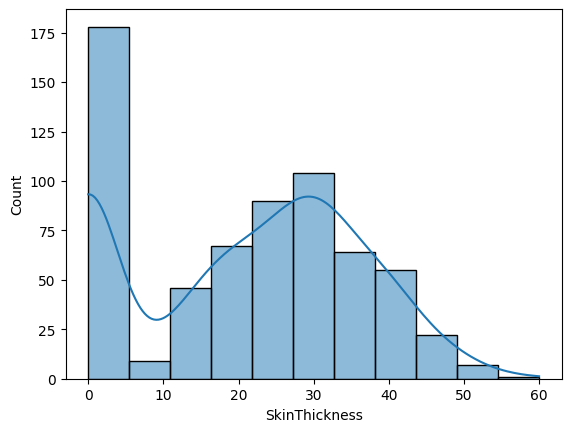

In [75]:
# For Skin Thickness
sns.histplot(df,x='SkinThickness',kde=1)

In [76]:
# Applying Shapiro Test
stats.shapiro(df['SkinThickness'])

ShapiroResult(statistic=0.9102285175000349, pvalue=4.96582432605641e-19)

<Axes: xlabel='Insulin', ylabel='Count'>

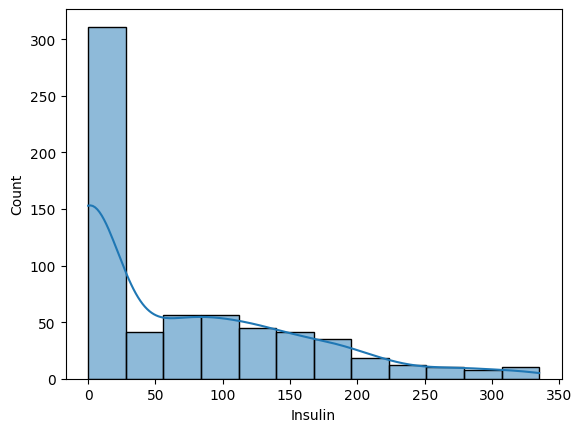

In [78]:
# For Insulin
sns.histplot(df,x='Insulin',kde=1)

In [79]:
stats.shapiro(df['Insulin'])

ShapiroResult(statistic=0.8086533702319947, pvalue=6.626128468102004e-27)

<Axes: xlabel='BMI', ylabel='Count'>

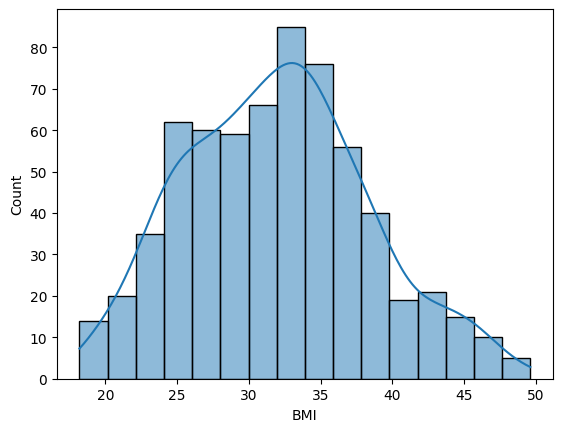

In [82]:
# FOR BMI
sns.histplot(df,x='BMI',kde=1)

In [81]:
stats.shapiro(df['BMI'])

ShapiroResult(statistic=0.9903904500091317, pvalue=0.00033161479280249416)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

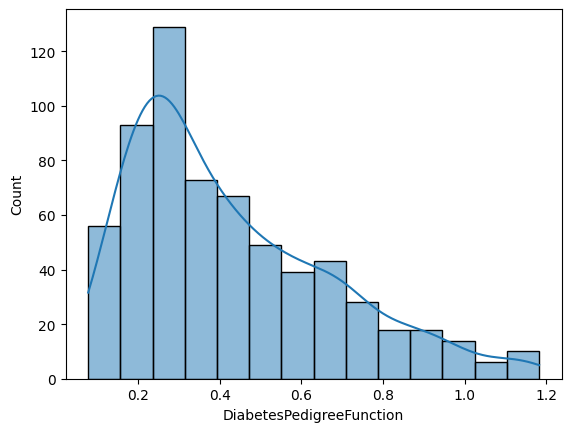

In [83]:
# For DiabetesPedigreeFunction
sns.histplot(df,x='DiabetesPedigreeFunction',kde=1)

In [84]:
stats.shapiro(df['DiabetesPedigreeFunction'])

ShapiroResult(statistic=0.9172664563972951, pvalue=2.874715640770014e-18)

<Axes: xlabel='Age', ylabel='Count'>

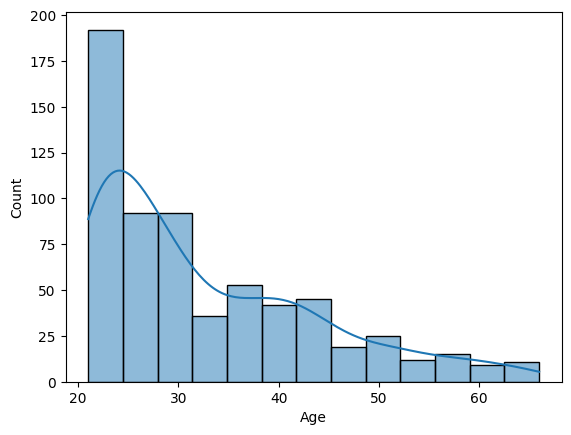

In [86]:
# For Age 
sns.histplot(df,x='Age',kde=1)

In [87]:
# Applying Shapiro Test 
stats.shapiro(df['Age'])

ShapiroResult(statistic=0.8781661989967464, pvalue=4.937360222447931e-22)

In [95]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# ML ALGORTHIM STARTS HERE 

In [98]:
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [100]:
y=df['Outcome']

In [147]:
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)

# Decision Tree Classifier

In [149]:
# Applying Machine Learning ALgorithm
model=DecisionTreeClassifier()

In [150]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [151]:
predicted_values=model.predict(x_test)

In [152]:
# Checking the Accuracy of our model
print("Accuracy Score of  Decision Tree Classifier model is ",accuracy_score(y_test,predicted_values))

Accuracy Score of  Decision Tree Classifier model is  0.8


In [153]:
# Checking the Precison Score of our Model 
print("Precision Score of Decision Tree Classifer is ", precision_score(y_test,predicted_values))

Precision Score of Decision Tree Classifer is  0.65


In [154]:
# Checking the F1 Score of our Model 
print("F1 Score of our Decision Tree Classifier is ",f1_score(y_test,predicted_values))

F1 Score of our Decision Tree Classifier is  0.6666666666666666


In [155]:
# Confusion Matrix for our Model is 
print('Confusion Matrix for Our Decision Tree Classifier is',confusion_matrix(y_test,predicted_values))
conf_matrix=confusion_matrix(y_test,predicted_values)

Confusion Matrix for Our Decision Tree Classifier is [[39  7]
 [ 6 13]]


<Axes: >

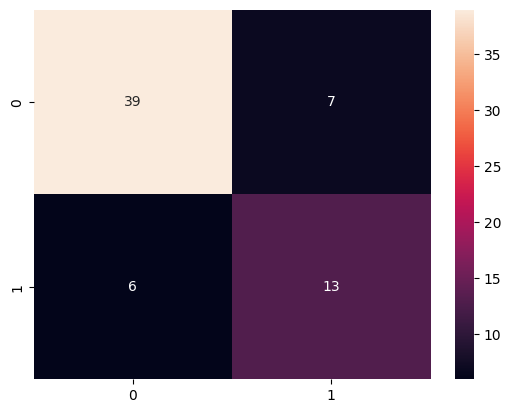

In [156]:
sns.heatmap(conf_matrix,annot=True)

# SVC Classifier

In [157]:
model=SVC()

In [158]:
model.fit(x_train,y_train)

SVC()

In [159]:
predicted_values=model.predict(x_test)

In [160]:
# Checking the Accuracy of our model
print("Accuracy Score of  SVM Classifier model is ",accuracy_score(y_test,predicted_values))

Accuracy Score of  SVM Classifier model is  0.8153846153846154


In [161]:
 #Checking the Precison Score of our Model 
print("Precision Score of SVM Classifer is ", precision_score(y_test,predicted_values))

Precision Score of SVM Classifer is  0.8181818181818182


In [162]:
# Checking the F1 Score of our Model 
print("F1 Score of our SVM Classifier is ",f1_score(y_test,predicted_values))

F1 Score of our SVM Classifier is  0.6


In [163]:
# Confusion Matrix for our Model is 
print('Confusion Matrix for Our SVM Classifier is',confusion_matrix(y_test,predicted_values))
conf_matrix=confusion_matrix(y_test,predicted_values)

Confusion Matrix for Our SVM Classifier is [[44  2]
 [10  9]]


<Axes: >

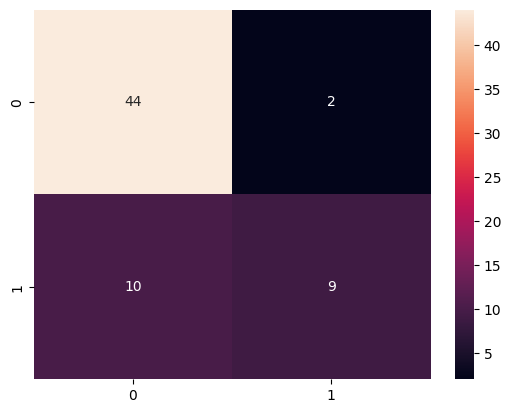

In [164]:
sns.heatmap(conf_matrix,annot=True)

# Logistic Regression 


In [165]:
model=LogisticRegression()

In [166]:
model.fit(x_train,y_train)

c:\Users\FATTANI COMPUTERS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [168]:
predicted_values=model.predict(x_test)

In [169]:
# Checking the Accuracy of our model
print("Accuracy Score of Logistic Regression model is ",accuracy_score(y_test,predicted_values))

Accuracy Score of Logistic Regression model is  0.8307692307692308


In [170]:
#  Checking the Precison Score of our Model 
print("Precision Score of Logistic Regeression is ", precision_score(y_test,predicted_values))

Precision Score of Logistic Regeression is  0.75


In [171]:
# Checking the F1 Score of our Model 
print("F1 Score of our Logistic Regression is ",f1_score(y_test,predicted_values))

F1 Score of our Logistic Regression is  0.6857142857142857


In [172]:
# Confusion Matrix for our Model is 
print('Confusion Matrix for Our Logistic Regression is',confusion_matrix(y_test,predicted_values))
conf_matrix=confusion_matrix(y_test,predicted_values)

Confusion Matrix for Our Logistic Regression is [[42  4]
 [ 7 12]]


<Axes: >

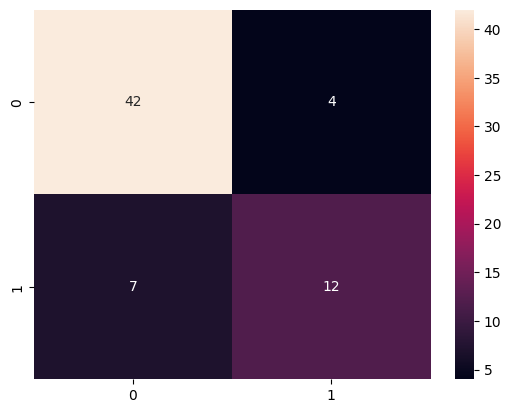

In [173]:
sns.heatmap(conf_matrix,annot=True)

# Conclusion 
## According to my Analysis , SVM(SUPPORT VECTOR MACHINE) AND LOGISTIC REGRESSION ALGORITHMS WILL REMAIN BEST IN THIS SCENERIO 